<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Исследование-объявлений-о-продаже-квартир" data-toc-modified-id="Исследование-объявлений-о-продаже-квартир-1">Исследование объявлений о продаже квартир</a></span></li><li><span><a href="#Импортируем-все-необходимые-библиотеки-и-устанавливаем-параметры-для-дальнейшей-работы" data-toc-modified-id="Импортируем-все-необходимые-библиотеки-и-устанавливаем-параметры-для-дальнейшей-работы-2">Импортируем все необходимые библиотеки и устанавливаем параметры для дальнейшей работы</a></span></li><li><span><a href="#Изучим-общую-информацию" data-toc-modified-id="Изучим-общую-информацию-3">Изучим общую информацию</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-4">Предобработка данных</a></span></li><li><span><a href="#Добавим-в-таблицу-новые-столбцы-для-дальнейшей-работы-с-ними" data-toc-modified-id="Добавим-в-таблицу-новые-столбцы-для-дальнейшей-работы-с-ними-5">Добавим в таблицу новые столбцы для дальнейшей работы с ними</a></span></li><li><span><a href="#Проведём-исследовательский-анализ-данных" data-toc-modified-id="Проведём-исследовательский-анализ-данных-6">Проведём исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-7">Общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

# Импортируем все необходимые библиотеки и устанавливаем параметры для дальнейшей работы

**Импортируем библиотеки.**

In [1]:
import warnings
warnings.simplefilter("ignore")
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)  
pd.options.display.float_format = '{:.2f}'.format
import numpy as np

In [2]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

# Изучим общую информацию

In [3]:
data.head(50)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00
2,10,5196000.00,56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,False,False,NaN,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00
5,10,2890000.00,30.40,2018-09-10T00:00:00,1,NaN,12.00,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00
6,6,3700000.00,37.30,2017-11-02T00:00:00,1,NaN,26.00,10.60,6,NaN,False,False,14.40,1.00,посёлок Парголово,52996.00,19143.00,0.00,NaN,0.00,NaN,155.00
7,5,7915000.00,71.60,2019-04-18T00:00:00,2,NaN,24.00,NaN,22,NaN,False,False,18.90,2.00,Санкт-Петербург,23982.00,11634.00,0.00,NaN,0.00,NaN,NaN
8,20,2900000.00,33.16,2018-05-23T00:00:00,1,NaN,27.00,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00
9,18,5400000.00,61.00,2017-02-26T00:00:00,3,2.50,9.00,43.60,7,NaN,False,False,6.50,2.00,Санкт-Петербург,50898.00,15008.00,0.00,NaN,0.00,NaN,289.00


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
data.isna().mean()*100

total_images            0.00
last_price              0.00
total_area              0.00
first_day_exposition    0.00
rooms                   0.00
ceiling_height         38.80
floors_total            0.36
living_area             8.03
floor                   0.00
is_apartment           88.29
studio                  0.00
open_plan               0.00
kitchen_area            9.61
balcony                48.61
locality_name           0.21
airports_nearest       23.38
cityCenters_nearest    23.29
parks_around3000       23.28
parks_nearest          65.91
ponds_around3000       23.28
ponds_nearest          61.56
days_exposition        13.42
dtype: float64

In [6]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.00,23699.00,23699.00,23699.00,14504.00,23613.00,21796.00,23699.00,21421.00,12180.00,18157.00,18180.00,18181.00,8079.00,18181.00,9110.00,20518.00
mean,9.86,6541548.77,60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,28793.67,14191.28,0.61,490.80,0.77,517.98,180.89
std,5.68,10887013.27,35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,12630.88,8608.39,0.80,342.32,0.94,277.72,219.73
min,0.00,12190.00,12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,3400000.00,40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,18585.00,9238.00,0.00,288.00,0.00,294.00,45.00
50%,9.00,4650000.00,52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,26726.00,13098.50,0.00,455.00,1.00,502.00,95.00
75%,14.00,6800000.00,69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,37273.00,16293.00,1.00,612.00,1.00,729.00,232.00
max,50.00,763000000.00,900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,84869.00,65968.00,3.00,3190.00,3.00,1344.00,1580.00


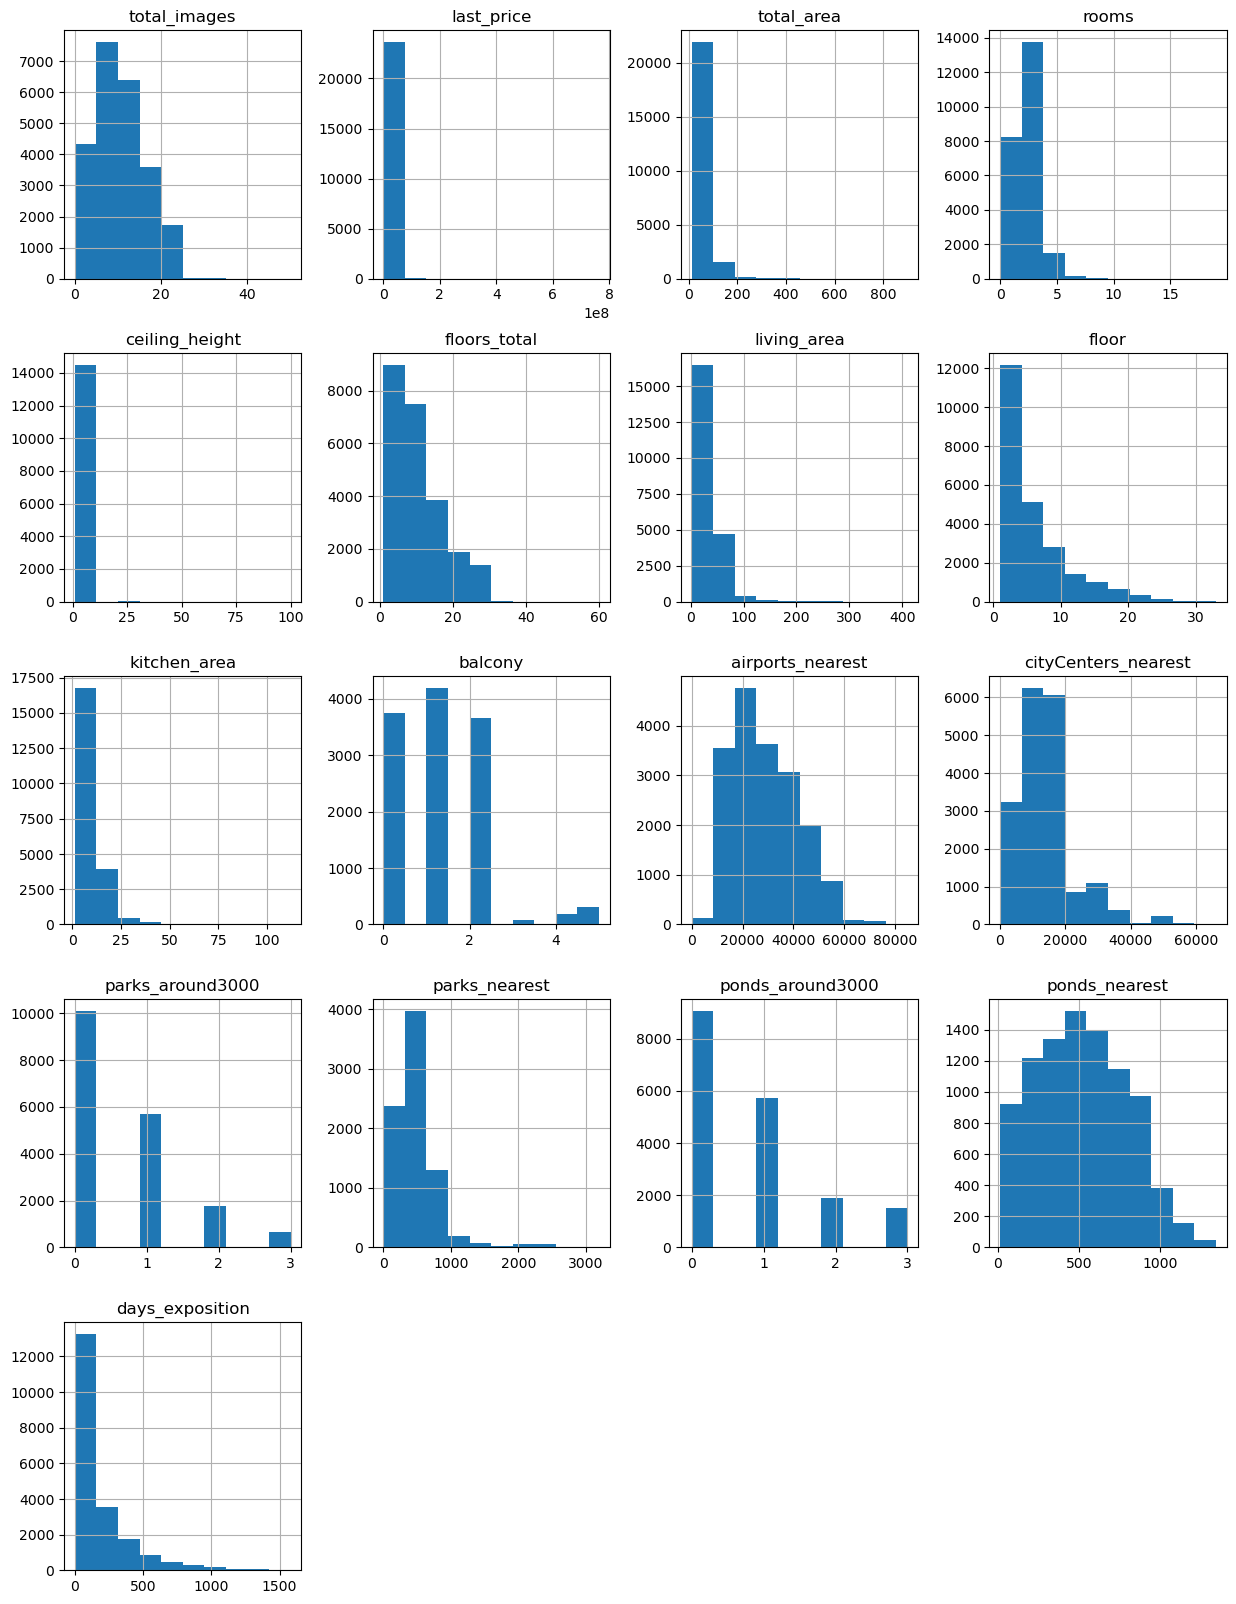

In [7]:
data.hist(figsize=(15, 20));

**Вывод: изучив данные были обнаружены пропуски в cтолбцах: "ceiling_height", "floors_total", "living_area","is_apartment" "kitchen_area", "balcony", "locality_name", "airports_nearest", "cityCenters_nearest", "parks_around3000", "parks_nearest", "ponds_around3000", "ponds_nearest", "days_exposition".
Также были обнаружены аномальные значения в столбцах: "ceiling_height", "total_area", "living_area", "kitchen_area", "floors_total", "rooms", "last_price".**

# Предобработка данных

**Выведем количество пропущенных значений в данных.**

In [8]:
data.isna().mean()*100

total_images            0.00
last_price              0.00
total_area              0.00
first_day_exposition    0.00
rooms                   0.00
ceiling_height         38.80
floors_total            0.36
living_area             8.03
floor                   0.00
is_apartment           88.29
studio                  0.00
open_plan               0.00
kitchen_area            9.61
balcony                48.61
locality_name           0.21
airports_nearest       23.38
cityCenters_nearest    23.29
parks_around3000       23.28
parks_nearest          65.91
ponds_around3000       23.28
ponds_nearest          61.56
days_exposition        13.42
dtype: float64

**Проверим данные на наличие явных дубликатов.**

In [9]:
data.duplicated().sum()

0

**Переименуем столбец 'cityCenters_nearest' для дальнейшей комфортной работы с ним.**

In [10]:
data.rename(columns={'cityCenters_nearest' : 'city_сenters_nearest'}, inplace=True)

**Возможно пропуски в "balcony" означают, что в помещении отсутствуют балконы. Заменим пропуски нулевым значением.**

In [11]:
data['balcony'] = data['balcony'].fillna(0)

**Заменим пропуски в "is_apartmen" на булевые значения. Вероятнее всего пропуски означают отсутствие балкона.**

In [12]:
data['is_apartment'] = data['is_apartment'].fillna(False) 

**Рассмотрим уникальные значения в "locality_name".**

In [13]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

**Выведем количество уникальных значений в "locality_name".**

In [14]:
data['locality_name'].nunique()

364

**Избавимся от неявных дубликатов в "locality_name". Заменим "ё" на "е". Удалим слова "село", "городской", "деревня", "городского типа" из названий населённых пунктов.**

In [15]:
data['locality_name'] = data['locality_name'].replace('ё', 'е', regex=True)

In [16]:
data['locality_name'] = data['locality_name'].replace(
    ['село ', 'городской ', 'деревня ', 'городского типа '], '', regex=True)

**Повторно выведем количество уникальных значений.**

In [17]:
data['locality_name'].nunique()

320

**Заполним пропуски в столбце "ceiling_height" медианными значениями по количеству этажей в "floors_total".**

In [18]:
for t in data['floors_total'].unique():
    data.loc[(data['floors_total'] == t) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[(data['floors_total'] == t), 'ceiling_height'].median()

**Заполним пропуски в столбцах "living_area" и "kitchen_area" медианными значениями по количеству комнат в столбце "rooms".**

In [19]:
for t in data['rooms'].unique():
    data.loc[(data['rooms'] == t) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['rooms'] == t), 'living_area'].median()

In [20]:
for t in data['rooms'].unique():
    data.loc[(data['rooms'] == t) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
    data.loc[(data['rooms'] == t), 'kitchen_area'].median()

**Убедимся в правильности ранее принятых решений и выведем количество пропусков в столбцах.**

In [21]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height             78
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area              197
balcony                     0
locality_name              49
airports_nearest         5542
city_сenters_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Для дальнейшего анализа в 'city_сenters_nearest' заменим пропущенные значения на "88888888".**

In [22]:
data['city_сenters_nearest'] = data['city_сenters_nearest'].fillna(88888888)

**Удалим оставшиеся пропуски.**

In [23]:
data.dropna(subset=['ceiling_height'], inplace=True)

In [24]:
data.dropna(subset=['floors_total'], inplace=True)

In [25]:
data.dropna(subset=['kitchen_area'], inplace=True)

In [26]:
data.dropna(subset=['locality_name'], inplace=True)

**Изменим типы данных где это возможно.**

In [27]:
data['last_price'] = data['last_price'].astype('int')
data['floors_total'] = data['floors_total'].astype('int')
data['balcony'] = data['balcony'].astype('int')
data['city_сenters_nearest'] = data['city_сenters_nearest'].astype('int')
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d %H:%M:%S')

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23370 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23370 non-null  int64         
 1   last_price            23370 non-null  int32         
 2   total_area            23370 non-null  float64       
 3   first_day_exposition  23370 non-null  datetime64[ns]
 4   rooms                 23370 non-null  int64         
 5   ceiling_height        23370 non-null  float64       
 6   floors_total          23370 non-null  int32         
 7   living_area           23370 non-null  float64       
 8   floor                 23370 non-null  int64         
 9   is_apartment          23370 non-null  bool          
 10  studio                23370 non-null  bool          
 11  open_plan             23370 non-null  bool          
 12  kitchen_area          23370 non-null  float64       
 13  balcony         

**Рассмотрим аномальные и редкие значения.**

In [29]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_сenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23370.00,23370.00,23370.00,23370.00,23370.00,23370.00,23370.00,23370.00,23370.00,23370.00,17923.00,23370.00,17947.00,8002.00,17947.00,8967.00,20213.00
mean,9.90,6566441.65,60.58,2.09,2.73,10.62,34.45,5.85,10.46,0.59,28825.49,20641340.01,0.61,490.25,0.77,518.29,181.37
std,5.68,10942688.46,35.61,1.07,0.99,6.57,21.76,4.85,5.66,0.96,12629.49,37520823.54,0.80,341.66,0.94,278.01,220.10
min,0.00,12190.00,12.00,1.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,3450000.00,40.20,1.00,2.55,5.00,18.50,2.00,7.30,0.00,18583.50,10912.00,0.00,288.00,0.00,293.00,45.00
50%,9.00,4650000.00,52.00,2.00,2.65,9.00,30.50,4.00,9.04,0.00,26770.00,14981.50,0.00,454.00,0.00,503.00,96.00
75%,14.00,6800000.00,70.00,3.00,2.75,16.00,42.80,8.00,11.50,1.00,37291.00,35051.00,1.00,612.00,1.00,730.00,232.00
max,50.00,763000000.00,900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,84869.00,88888888.00,3.00,3190.00,3.00,1344.00,1580.00


**Избавимся от аномалий и редких значений в 'ceiling_height' для потолков высотой более 25 метров.**

In [30]:
data.loc[data['ceiling_height'] > 25,  'ceiling_height'] = data.loc[data['ceiling_height'] > 25,  'ceiling_height'] / 10

**Избавимся от аномалий и редких значений в 'ceiling_height' для потолков высотой ниже 2.4 и выше 6 метров, заменив их медианным значением.**

In [31]:
data.loc[(data['ceiling_height'] < 2.4)  | (data['ceiling_height'] > 6),  'ceiling_height'] = data['ceiling_height'].median()

**Избавимся от аномалий и редких значений в 'total_area' для жилья c общей площадью менее 20 и более 300 квадратных метров, заменив их медианным значением.**

In [32]:
data.loc[(data['total_area'] < 20)  | (data['total_area'] > 300),  'total_area'] = data['total_area'].median()

**Избавимся от аномалий и редких значений в 'living_area' для жилья c общей площадью менее 10 и более 220 квадратных метров, заменив их медианным значением.**

In [33]:
data.loc[(data['living_area'] < 10)  | (data['living_area'] > 220),  'living_area'] = data['living_area'].median()

**Избавимся от аномалий и редких значений в 'kitchen_area' для жилья c общей площадью менее 5 и более 60 квадратных метров, заменив их медианным значением.**

In [34]:
data.loc[(data['kitchen_area'] < 5)  | (data['kitchen_area'] > 60),  'kitchen_area'] = data['kitchen_area'].median()

**Сгруппируем значения в 'floors_total',чтобы увидеть аномалии.**

In [35]:
data['floors_total'].value_counts()

5     5768
9     3746
16    1357
12    1354
4     1188
10    1169
25    1048
6      907
17     815
3      661
7      586
14     545
18     492
24     447
8      386
2      381
15     361
23     343
19     330
22     282
20     265
13     229
11     199
27     162
21     151
26     122
1       25
35      22
28      21
36       3
34       1
60       1
29       1
52       1
37       1
Name: floors_total, dtype: int64

**Удалим аномальные и редкие значения.**

In [36]:
data = data.query('not(floors_total >= 34)')

**Сгруппируем значения в 'rooms',чтобы увидеть аномалии.**

In [37]:
data['rooms'].value_counts()

1     7995
2     7881
3     5774
4     1172
5      325
6      104
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: rooms, dtype: int64

**Удалим аномальные и редкие значения.**

In [38]:
data = data.query('not(rooms >= 10)')

**Рассмотрим столбец "last_price"**

In [39]:
data['last_price'].describe()

count       23330.00
mean      6538126.55
std      10596523.80
min         12190.00
25%       3450000.00
50%       4650000.00
75%       6800000.00
max     763000000.00
Name: last_price, dtype: float64

**Построим диаграмму размаха, чтобы определить диапазоны выбросов.**

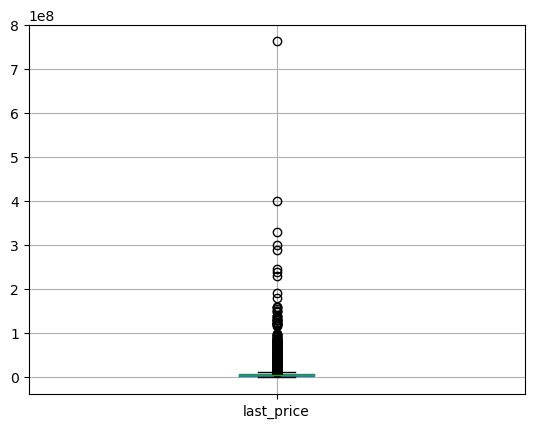

In [40]:
data.boxplot('last_price');

**Избавимся от аномалий и редких значений в 'last_price' для жилья c ценой выше 100000000.**

In [41]:
data = data.query('not(last_price > 100000000)')

**Рассмотрим цены ниже 500000.**

In [42]:
data.query('last_price < 500000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5698,7,450000,42.00,2017-07-31,2,2.80,1,23.00,1,False,False,False,5.80,0,поселок Будогощь,NaN,88888888,NaN,NaN,NaN,NaN,233.00
6859,6,490000,40.00,2017-12-11,1,2.55,5,17.60,3,False,False,False,9.04,0,Старополье,NaN,88888888,NaN,NaN,NaN,NaN,43.00
8793,7,12190,109.00,2019-03-20,2,2.75,25,32.00,25,False,False,False,40.50,0,Санкт-Петербург,36421.00,9176,1.00,805.00,0.00,NaN,8.00
9581,7,450000,43.40,2018-08-31,2,2.55,5,30.30,3,False,False,False,5.50,0,Старополье,NaN,88888888,NaN,NaN,NaN,NaN,96.00
10782,3,490000,29.10,2016-05-05,1,2.50,5,17.00,5,False,False,False,5.50,0,Сланцы,NaN,88888888,NaN,NaN,NaN,NaN,719.00
14911,5,430000,54.00,2018-06-26,2,2.80,3,30.50,3,False,False,False,8.80,0,поселок станции Свирь,NaN,88888888,NaN,NaN,NaN,NaN,44.00
16032,8,480000,32.00,2019-01-06,1,2.70,2,16.00,1,False,False,False,9.04,0,Сланцы,NaN,88888888,NaN,NaN,NaN,NaN,83.00
16219,14,450000,38.50,2018-07-11,2,2.65,2,30.50,1,False,False,False,8.80,0,Вахнова Кара,NaN,88888888,NaN,NaN,NaN,NaN,45.00
16274,18,440000,40.00,2018-07-10,1,2.55,5,17.60,1,False,False,False,9.04,0,Старополье,NaN,88888888,NaN,NaN,NaN,NaN,45.00
17456,7,430000,30.40,2019-04-22,1,2.70,2,16.00,1,False,False,False,6.00,0,Сланцы,NaN,88888888,NaN,NaN,NaN,NaN,NaN


**Удалим аномальное значение.**

In [43]:
data = data.query('not(last_price <= 12190)')

In [44]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5446
city_сenters_nearest        0
parks_around3000         5422
parks_nearest           15329
ponds_around3000         5422
ponds_nearest           14393
days_exposition          3143
dtype: int64

**Вывод: в ходе предобработки данных была были обработаны пропуски где это возможно,а именно в столбцах: "ceiling_height", "floors_total", "living_area", "is_apartment", "kitchen_area", "balcony", "locality_name", "city_сenters_nearest".Были исправлены некорректно введённые данные в  "locality_name".В ходе исследования также были удалены или заменены медианным значением аномалии в столбцах:"ceiling_height", "total_area", "living_area", "kitchen_area", "floors_total", "rooms","last_price".Изменены типы данных в столбцах:'last_price', 'floors_total', 'balcony', 'city_сenters_nearest', 'first_day_exposition'.**




# Добавим в таблицу новые столбцы для дальнейшей работы с ними

**Цена одного квадратного метра.**

In [45]:
data['price_m2'] = data['last_price'] / data['total_area']

**День недели публикации объявления (0 — понедельник, 1 — вторник и так далее).**

In [46]:
data['day'] = data['first_day_exposition'].dt.weekday

**Месяц публикации объявления.**

In [47]:
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month 

**Год публикации объявления.**

In [48]:
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year

**Тип этажа квартиры (значения — «первый», «последний», «другой»).**

In [49]:
def floor(row):
        if row['floor'] == 1:
            return 'первый'
        elif row['floor'] == row['floors_total']:
            return 'последний'
        else:
            return 'другой'
        
data['floor_type'] = data.apply(floor, axis=1)

**Расстояние до центра города в километрах.**

In [50]:
data['city_centers_nearest_km'] = data['city_сenters_nearest']/1000
data['city_centers_nearest_km'] = data['city_centers_nearest_km'].astype('int')

# Проведём исследовательский анализ данных

**Построим гистограмму для "total_area".**

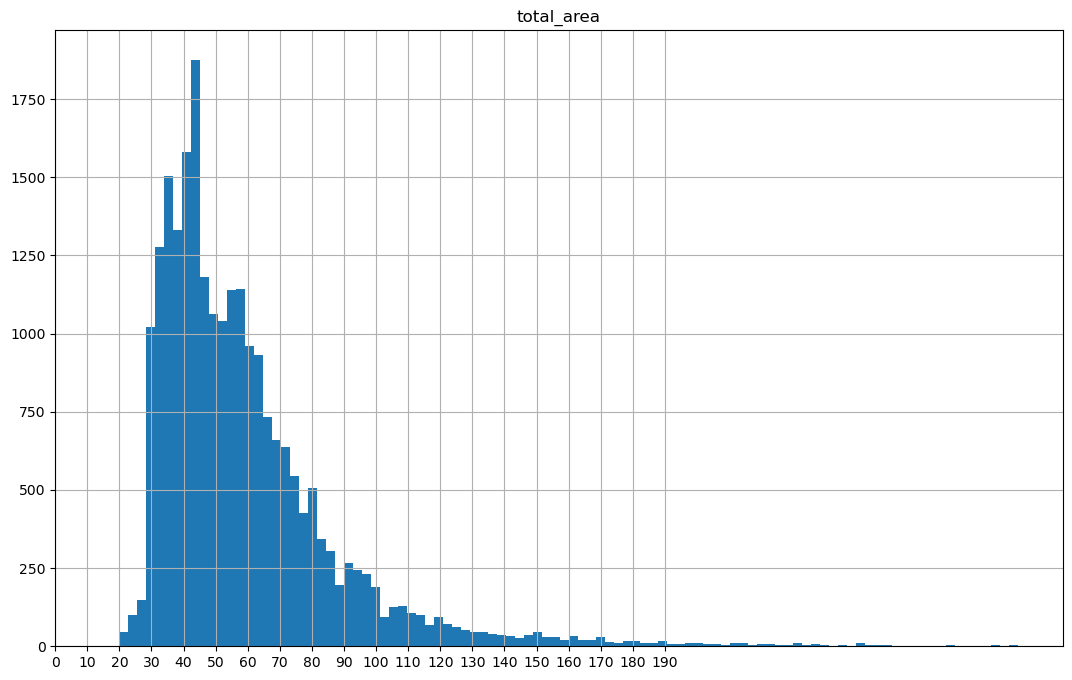

In [51]:
data.hist('total_area', bins = 100, figsize=(13, 8));
plt.xticks(np.arange(0,200,10));

**Рассмотрим гистограмму подробнее в промежутке от 20 до 150 квадратных метров.**

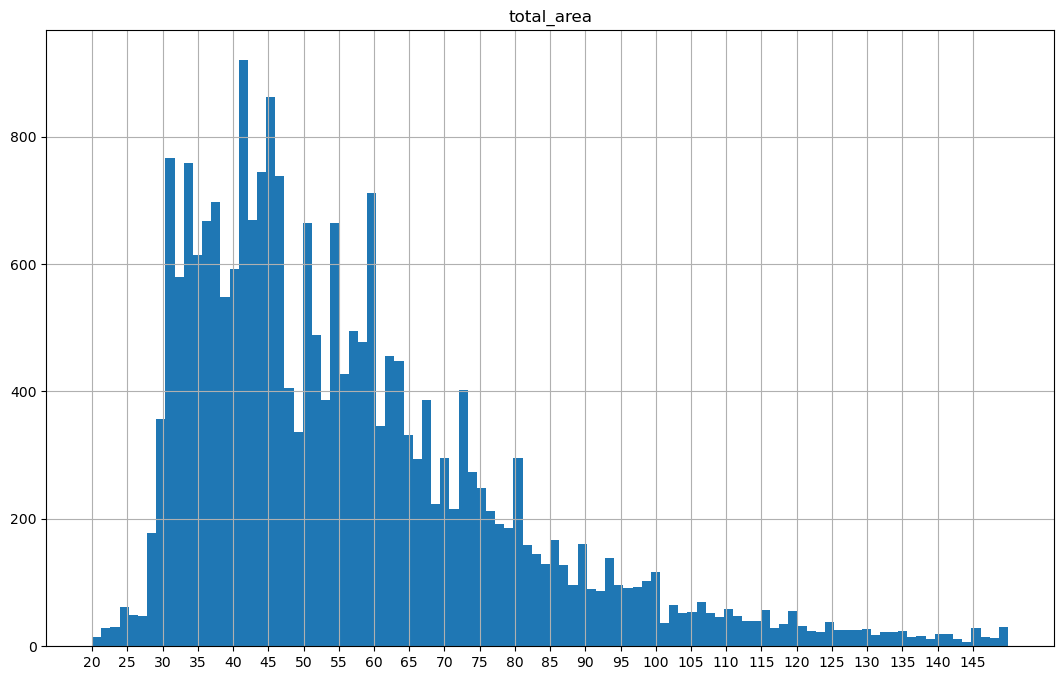

In [52]:
data.hist('total_area', bins = 100, range=(20,150), figsize=(13, 8));
plt.xticks(np.arange(20,150,5));

*Чаще всего встречаются квартиры с общей площадью в промежутке от 30 до 47 м/2. На гистограмме наблюдается большое количество пиков. Возможной причиной пиков являются разные застройщики и большая разница в годах постройки многоквартирного дома.*

**Построим гистограмму для "living_area".**

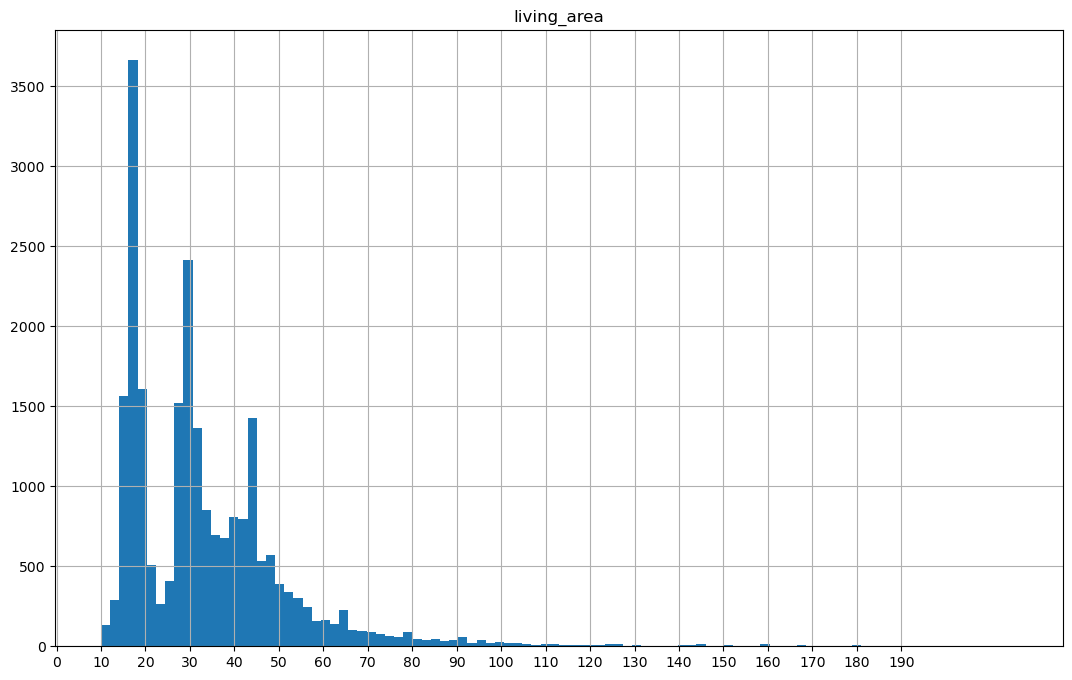

In [53]:
data.hist('living_area', bins = 100, figsize=(13, 8));
plt.xticks(np.arange(0,200,10));

**Рассмотрим гистограмму подробнее в промежутке от 20 до 100 м/2.**

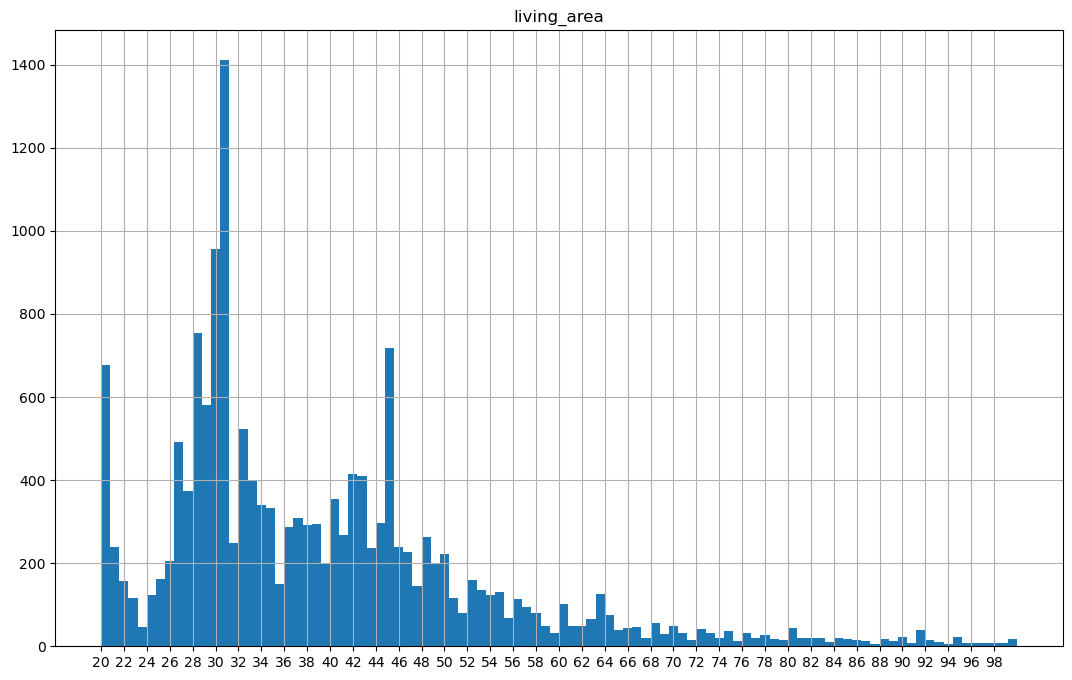

In [54]:
data.hist('living_area', bins = 100, range=(20,100), figsize=(13, 8));
plt.xticks(np.arange(20,100,2));

*Чаще всего встречаются квартиры с жилой площадью от 28 до 31. Так же можем наблюдать провал в показателях на отметках от 21 до 26 м/2. На гистограмме наблюдается большое количество пиков. Возможно причиной пиков являются разные застройщики и большая разница в годах постройки многоквартирного дома.*

**Построим гистограмму для "kitchen_area".**

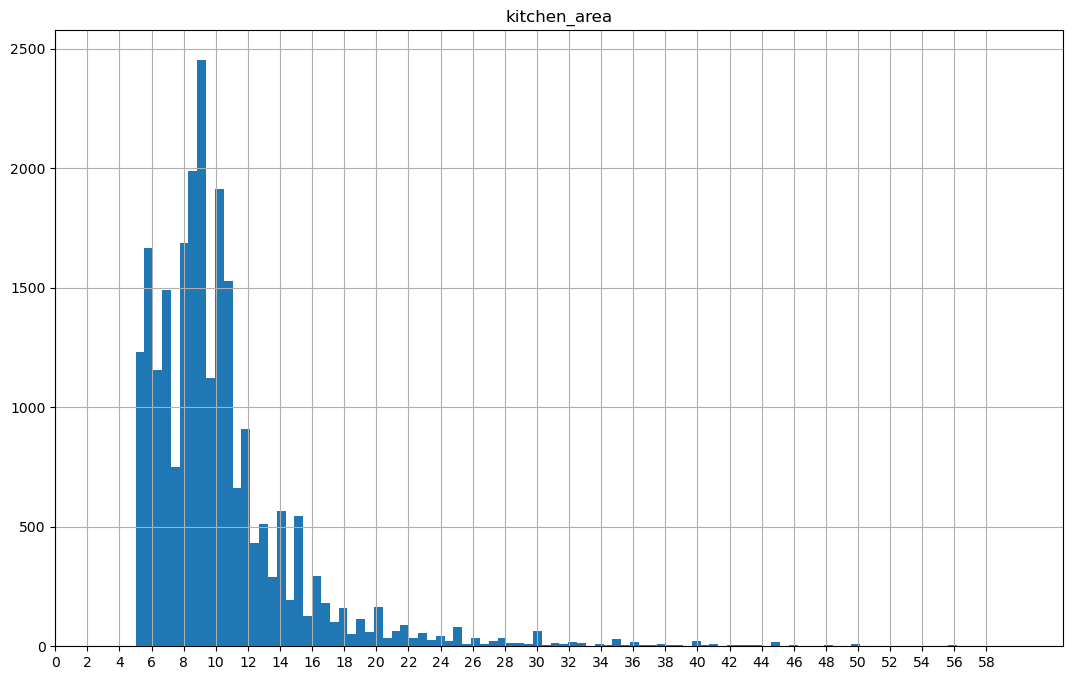

In [55]:
data.hist('kitchen_area', bins = 100, figsize=(13, 8));
plt.xticks(np.arange(0,60,2));

*Чаще всего встречаются квартиры с площадью кухни в пропромежутке от 5 до 11 м/2. Возможно причиной пиков являются разные застройщики и большая разница в годах постройки многоквартирного дома.*

**Разделим значения 'last_price' на 1000000,чтобы на горизонтальной оси корректней отображались значения.**

In [56]:
data['last_price'] = data['last_price'] / 1000000

**Построим гистограмму для "last_price" и изучим её.**

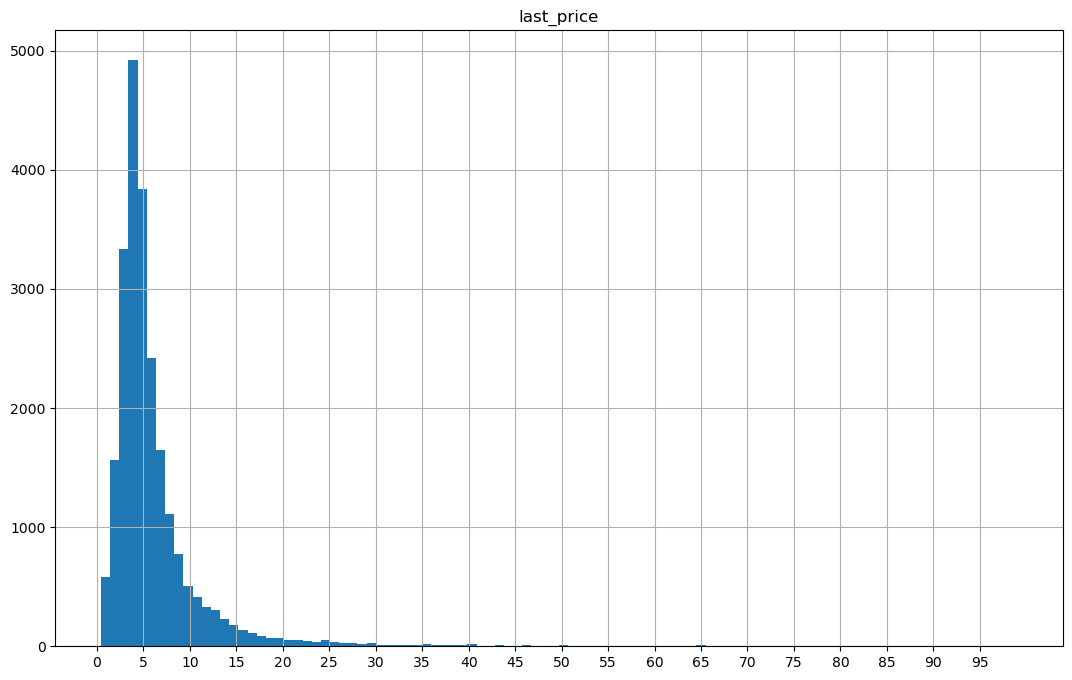

In [57]:
data.hist('last_price', bins = 100, figsize=(13, 8));
plt.xticks(np.arange(0,100,5));

**Рассмотрим гистограмму подробнее в промежутках от 0 до 30.**

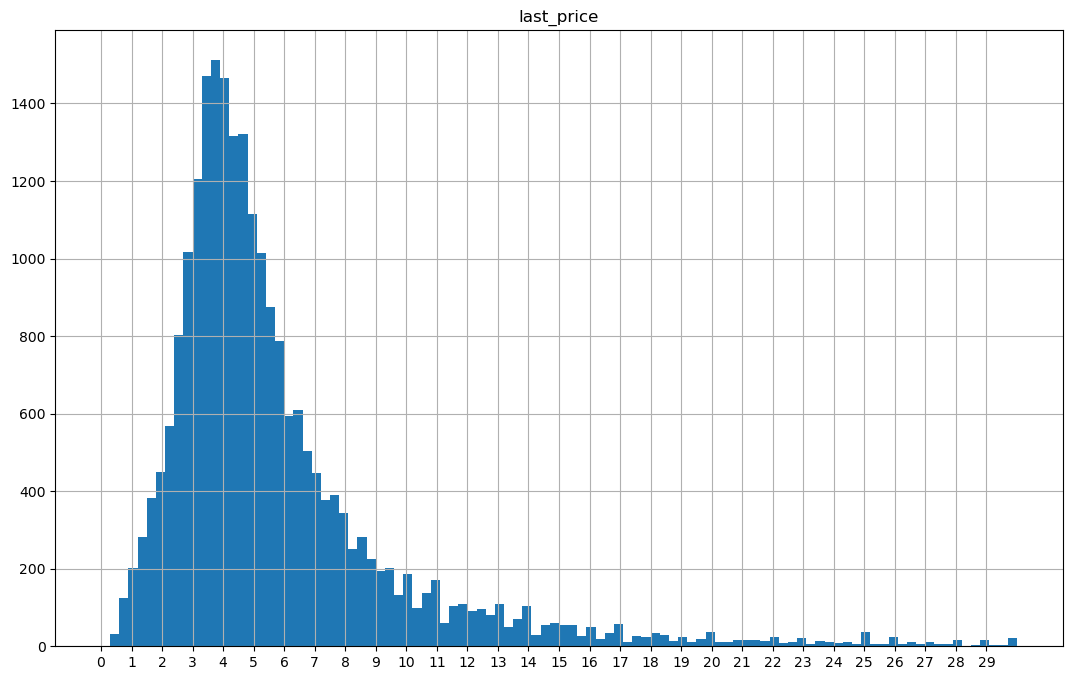

In [58]:
data.hist('last_price', bins = 100, range=(0,30), figsize=(13, 8));
plt.xticks(np.arange(0,30,1));

*Самыми востребованными на рынке являются цены от 3,2 до 4,1 миллиона рублей.На гистограмме мы  наблюдаем равномерный подъём и спад.*

**Построим гистограмму для "rooms" и рассмотрим её.**

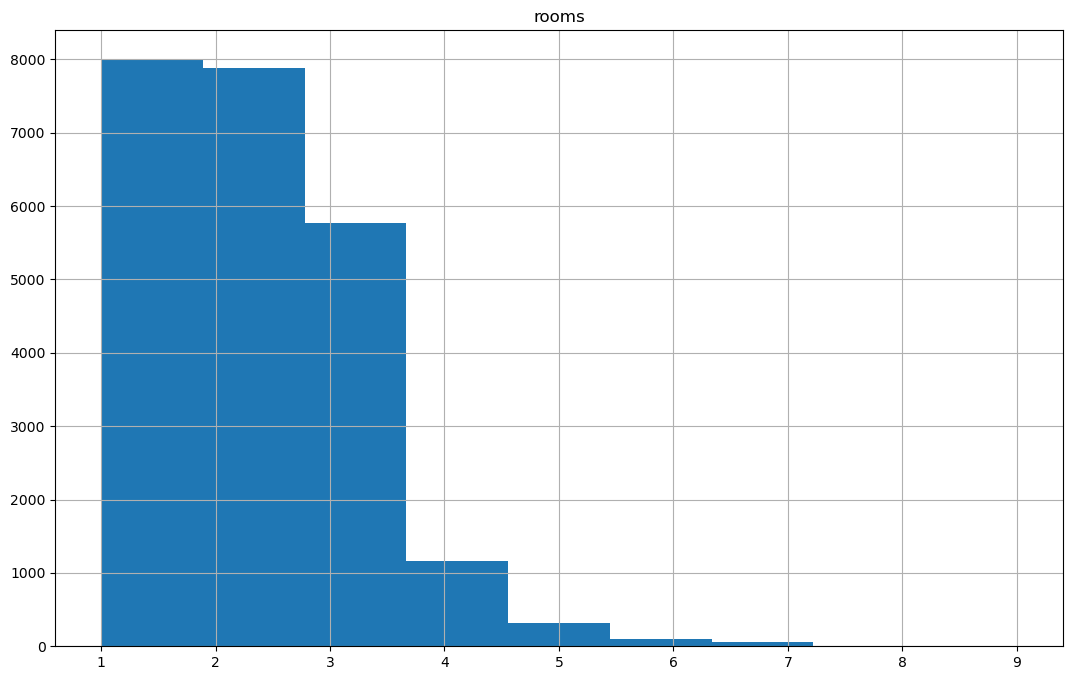

In [59]:
data.hist('rooms', bins=9, figsize=(13, 8));

*Интересной особенностью гистограммы является практически одинаковое количество однокомнатных и двухкомнатных квартир. Также бросается в глаза разница в количестве между трёхкомнатными и четырёхкомнатными апартаментами.*

**Построим гистограмму для "ceiling_height" и рассмотрим её.**

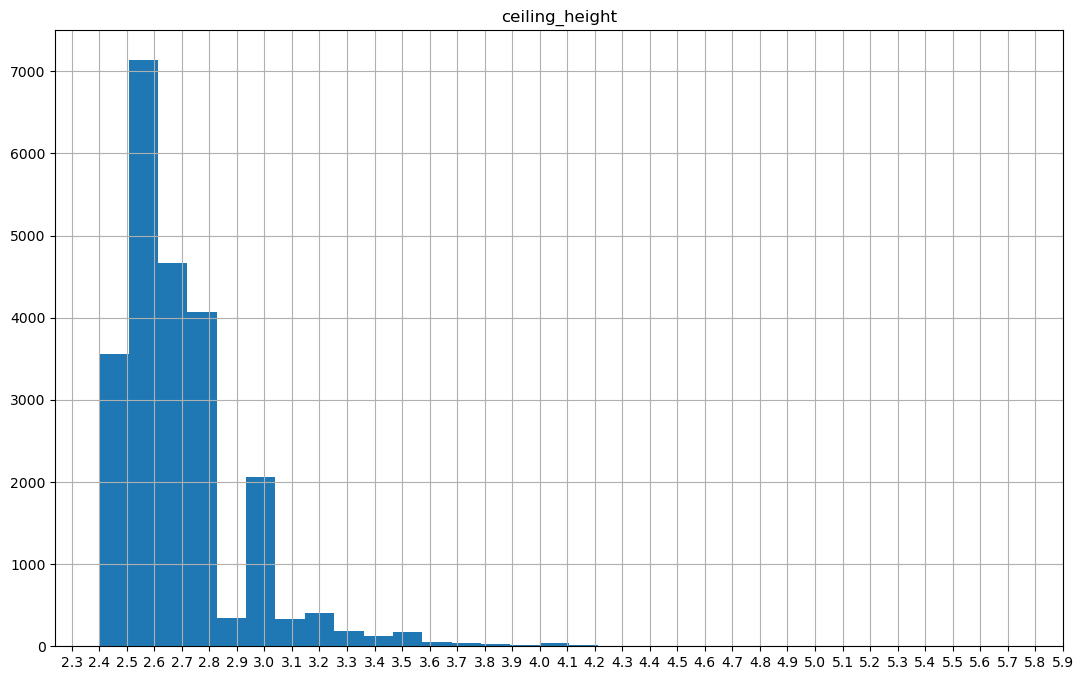

In [60]:
data.hist('ceiling_height', bins=30, figsize=(13, 8));
plt.xticks(np.arange(2.3,6,0.1));

*Как правило высота потолков в апартаментах от 2.4 до 2.8,что является среднестатистическим показателем в стране.*

**Построим гистограмму для "floor" и рассмотрим её.**

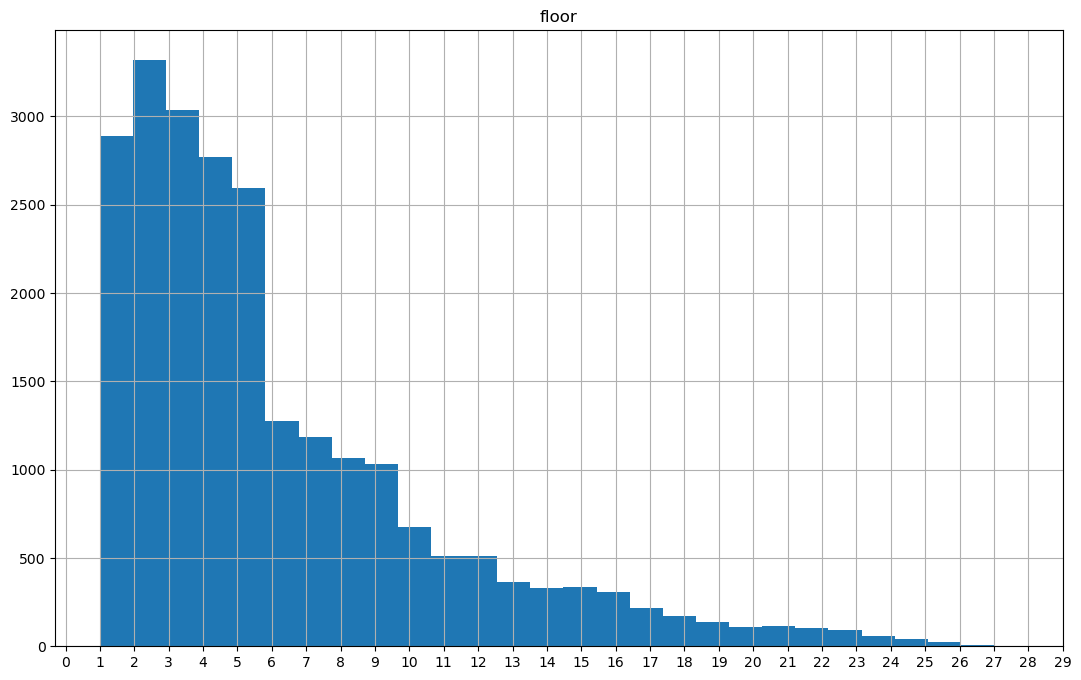

In [61]:
data.hist('floor', bins=27, figsize=(13, 8));
plt.xticks(np.arange(0,30,1));

*Чаще всего встречаются апартаменты с 1 по 6 этажи.*

**Изучим тип этажа квартиры («первый», «последний», «другой») всех представленных объектов.**

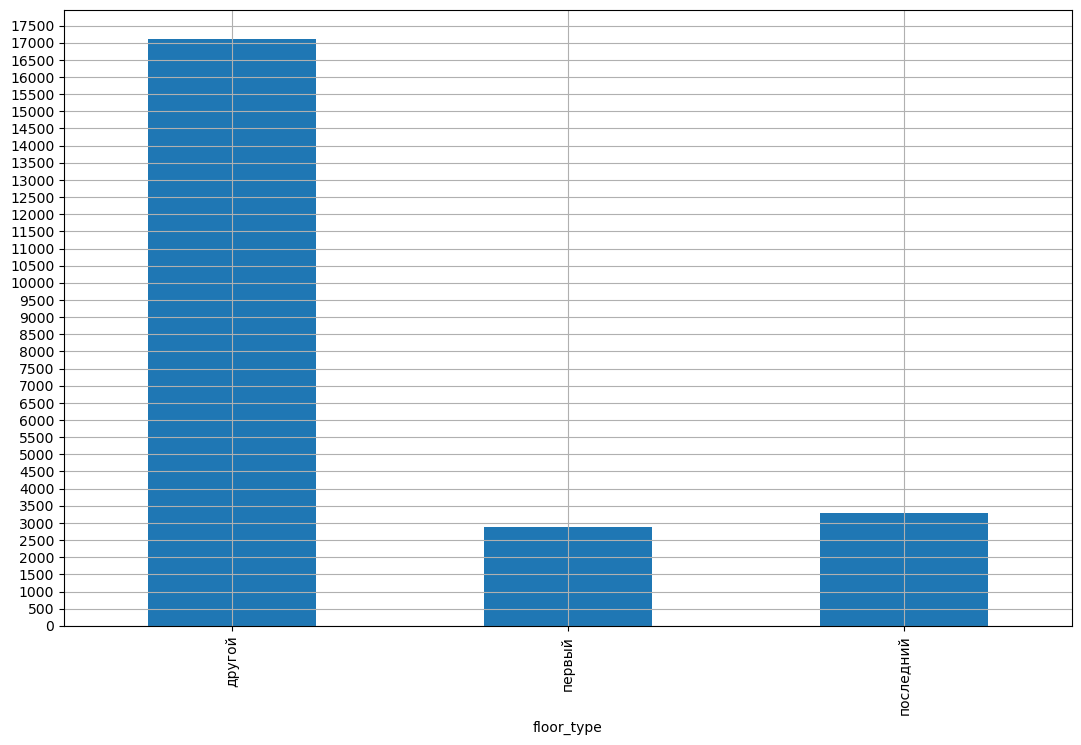

In [62]:
data.groupby(by='floor_type')['floor_type'].count().plot(kind='bar', figsize=(13, 8), grid=True);
plt.yticks(np.arange(0,18000,500));

*Объявлений с последним этажом больше на 500 в сравнении с первым.Наибольшее количество объявлений имеют все оставшиеся этажи которые состоят в группе "другие" около 17000 объявлений.*

**Изучим общее количество этажей в доме всех представленных объектов.**

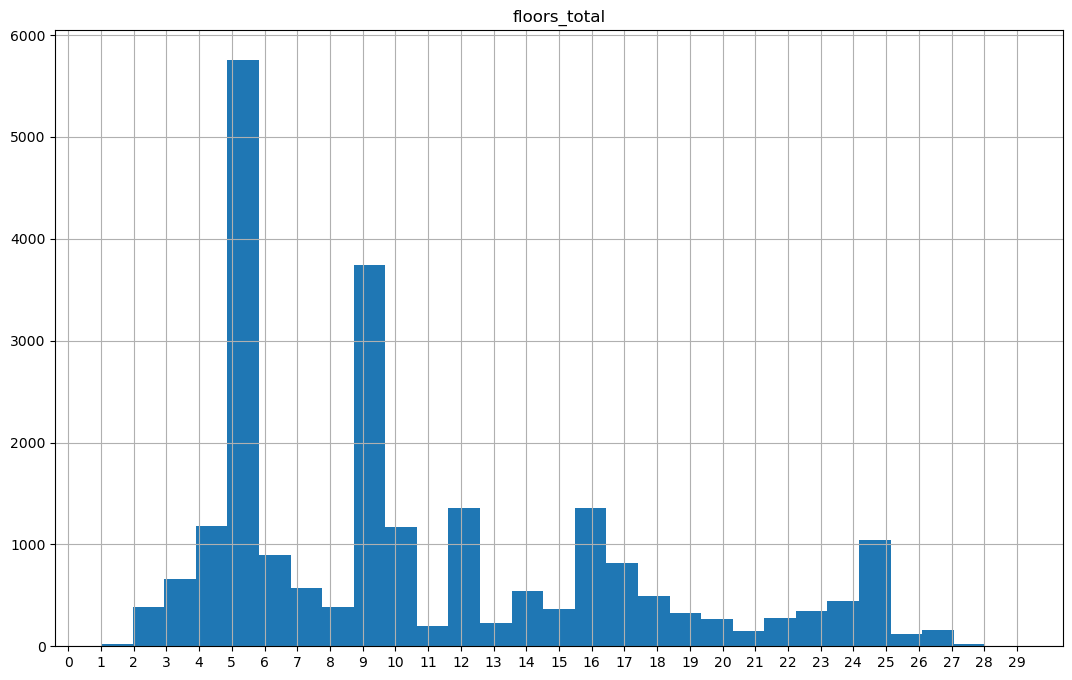

In [63]:
data.hist('floors_total', bins=29, figsize=(13, 8));
plt.xticks(np.arange(0,30,1));

In [64]:
data['city_сenters_nearest'].describe()

count      23293.00
mean    20705722.85
std     37561594.10
min          181.00
25%        10939.00
50%        14989.00
75%        35181.00
max     88888888.00
Name: city_сenters_nearest, dtype: float64

*Из графика мы можем сделать вывод, что чаще встречается среднеэтажные(3-5) и повышенной этажности(6-10) строения.*

**Построим гистограмму для "city_centers_nearest" и рассмотрим её.**

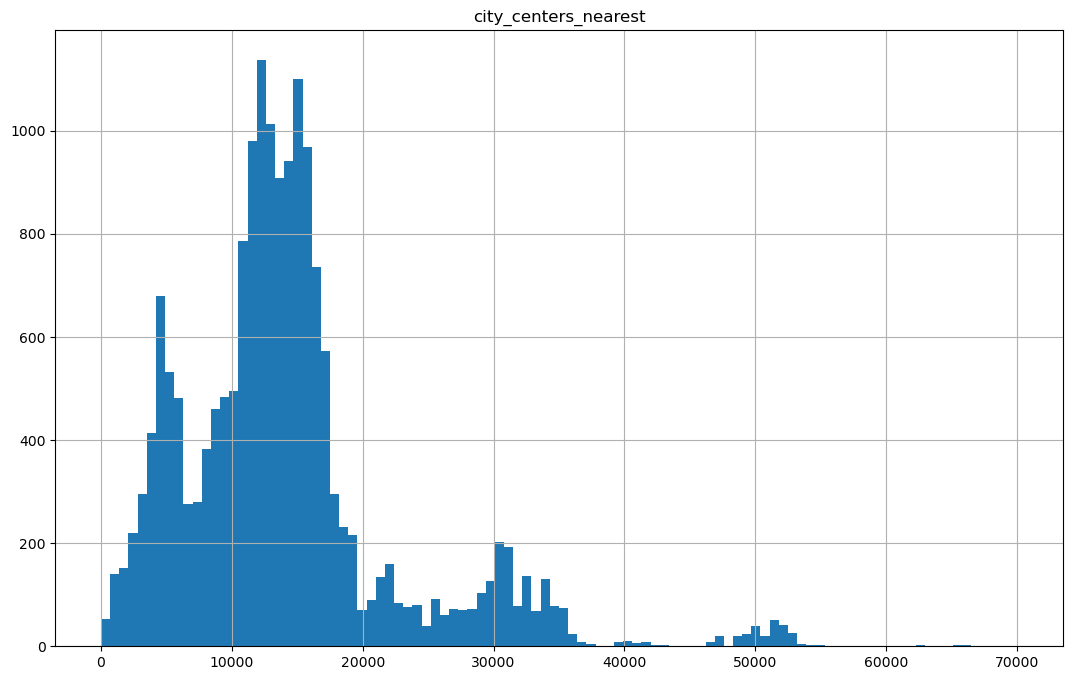

In [65]:
data.hist('city_сenters_nearest', bins=100, range=(0,70000), figsize=(13, 8));

*Большая часть объектов находится в пределах 20км от центра.*

**Изучим расстояние до ближайшего аэропорта всех представленных объектов.**

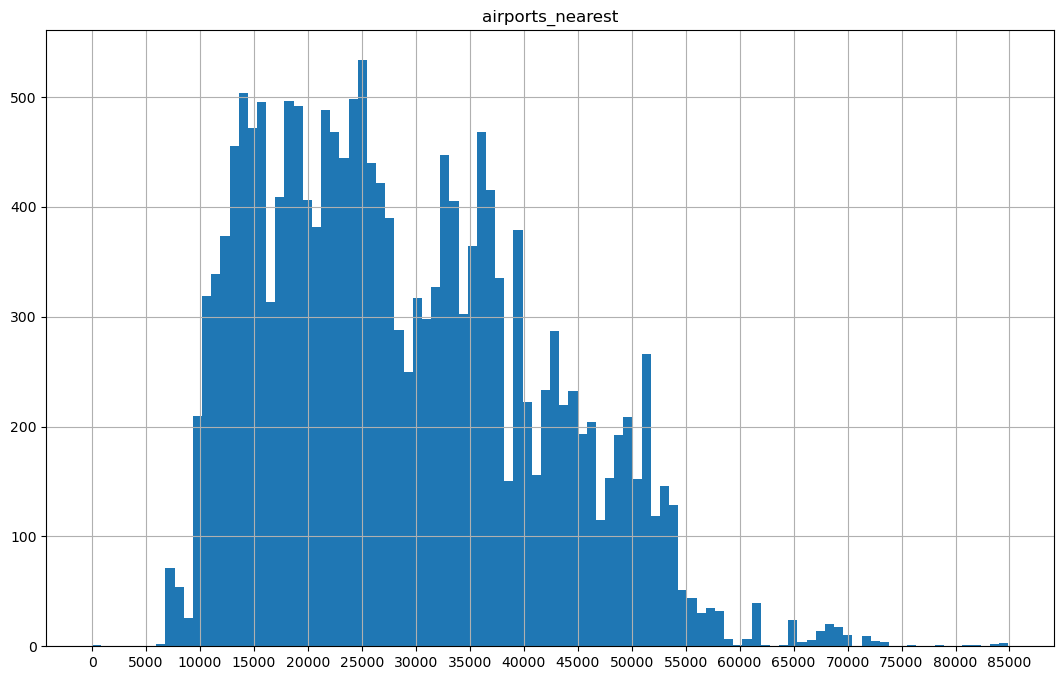

In [66]:
data.hist('airports_nearest', bins=100, figsize=(13, 8));
plt.xticks(np.arange(0,90000,5000));

*Большая часть объявлиний распологается в промежутках от 10000 до 40000 км. до аэропорта.*

**Изучим расстояние до ближайшего парка всех представленных объектов.**

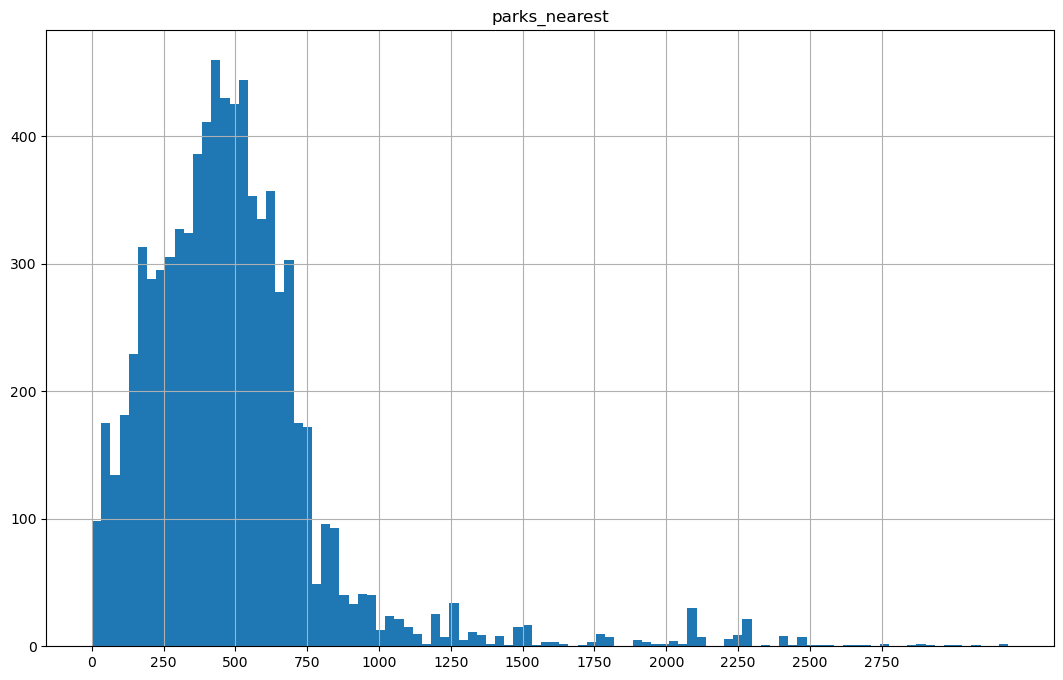

In [67]:
data.hist('parks_nearest', bins=100, figsize=(13, 8));
plt.xticks(np.arange(0,3000,250));

*Большинство парков находится в пределах 750 метров.*

**Изучим день публикации для всех представленных объектов.**

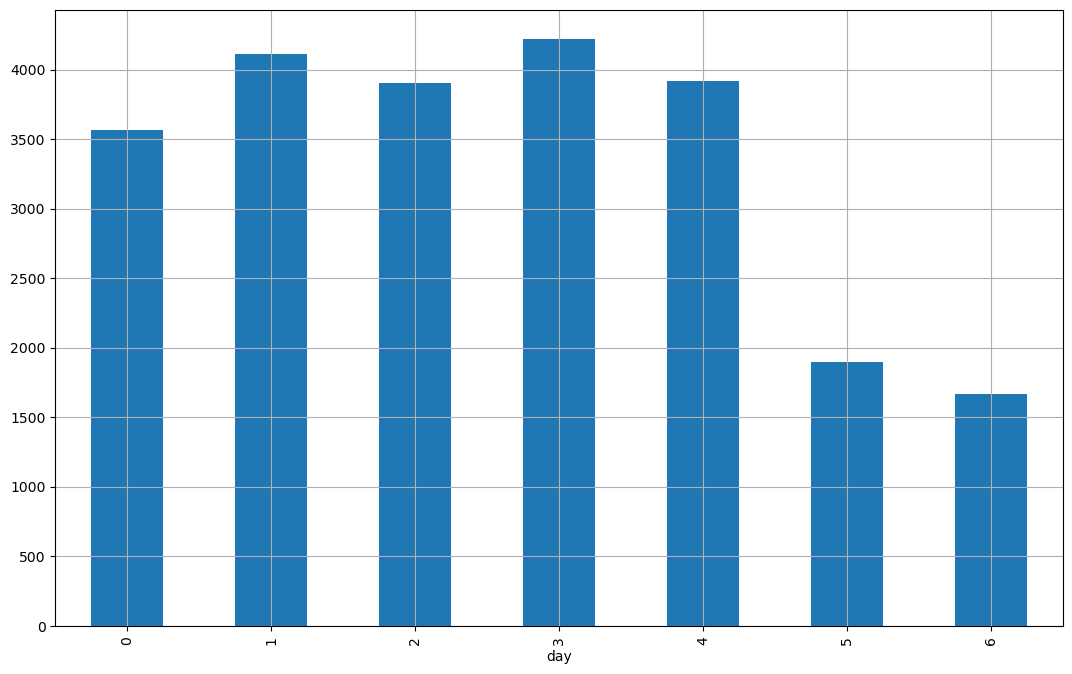

In [68]:
data.groupby(by='day')['day'].count().plot(kind='bar', figsize=(13, 8), grid=True);

*Из графика мы можем сделать вывод, что объявления публикуются реже в выходные дни.*

**Изучим месяц публикации для всех представленных объектов.**

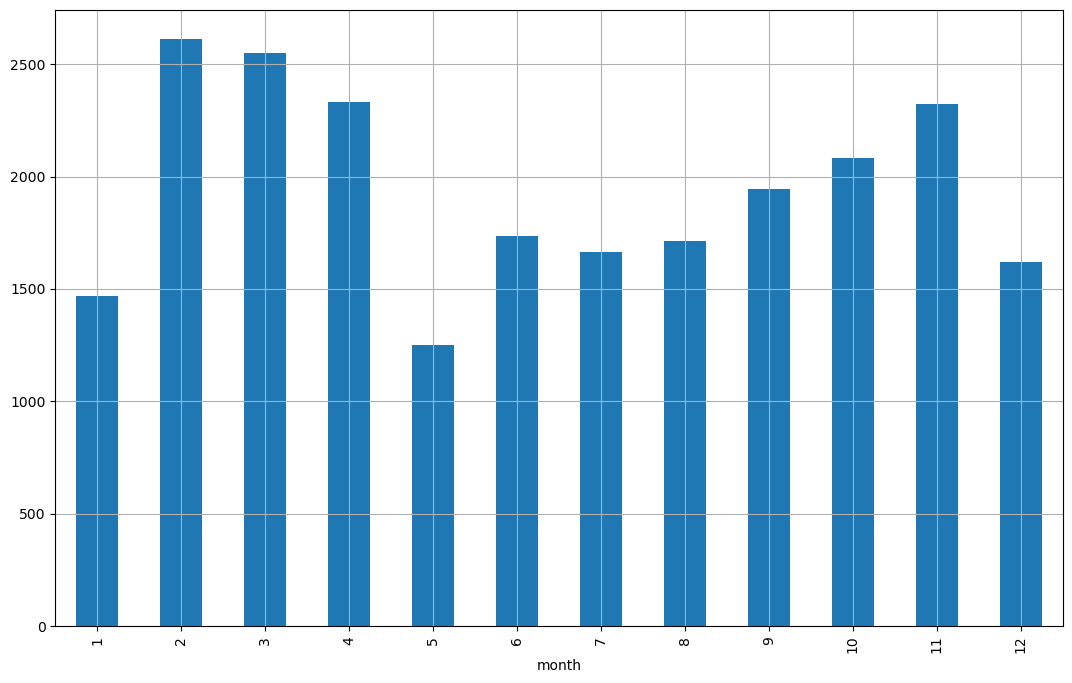

In [69]:
data.groupby(by='month')['month'].count().plot(kind='bar', figsize=(13, 8), grid=True);

*Из графика мы можем сделать вывод, что реже всего объявлению публиковались в мае. Самым популярным месяцем на подачу публикаций является февраль.*

**Изучим, как быстро продавались квартиры.**

Среднее время продажи квартиры в днях: 181.07007444168735
Медианное время продажи квартиры в днях: 96.0


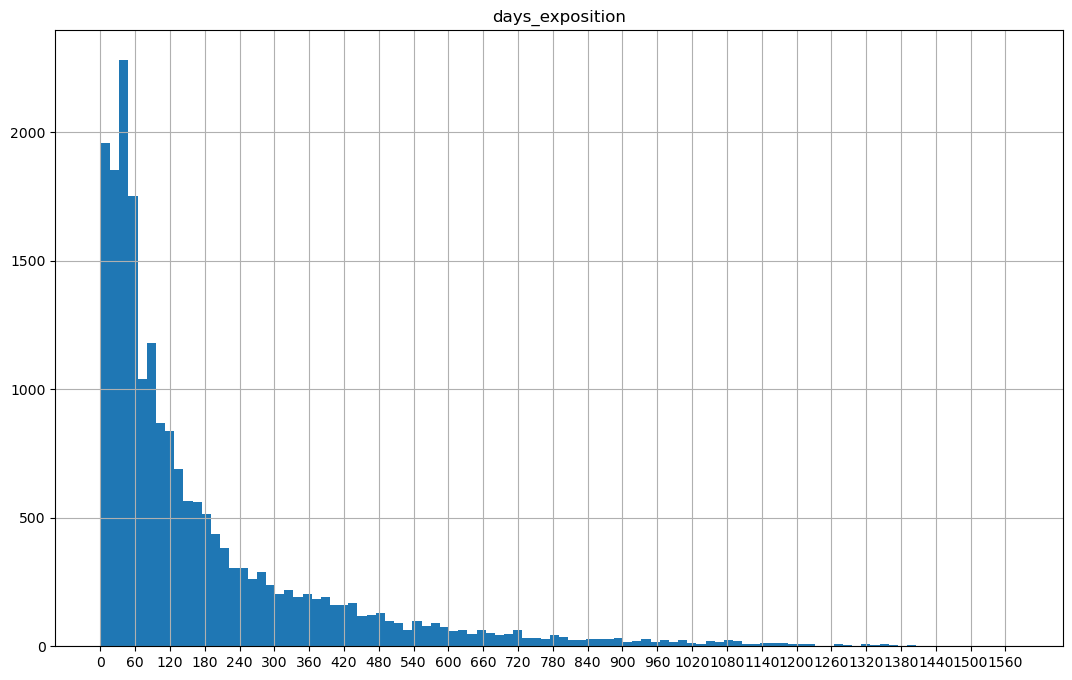

In [70]:
data.hist('days_exposition', bins=100, figsize=(13, 8));
plt.xticks(np.arange(0,1600,60));
print('Среднее время продажи квартиры в днях:', data['days_exposition'].mean())
print('Медианное время продажи квартиры в днях:', data['days_exposition'].median())

*Наблюдаем большое количество пиков в промежутке от 0 до 200. Рассмотрим график подробнее.*

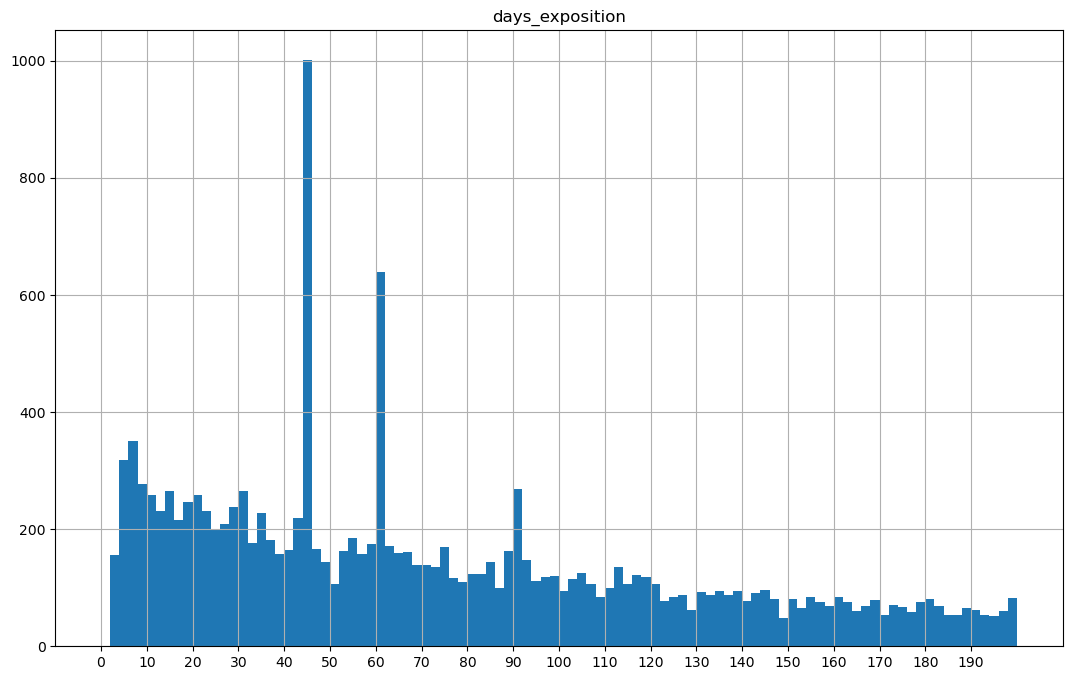

In [71]:
data.hist('days_exposition', bins=100, figsize=(13, 8), range = (0,200));
plt.xticks(np.arange(0,200,10));

*В среднем продажа квартиры происходит около трех месяцев. Срочная продажа подразумевает реализацию квартиры в срок не более одного месяца. Срочный выкуп — от 3 до 14 дней. Квартиры, продающиеся более полутора лет, можно считать необычно долгими.*

*На гистограмме мы можем заметить, что чаще продаются квартиры в первые 2 месяца.*

*На графике мы наблюдаем пики в значениях 45,60 и 90 дней.
На сайте "Яндекс" мы можем обнаружить информацию, что бесплатный период размещения объявлений о продаже до 4,5 млн — 45 дней, от 4,5 до 10 млн — 60 дней, от 10 млн — 90 дней. На графике мы наблюдаем пики в значениях 45, 60 и 90 дней. Из этого мы можем сделать вывод, что причиной пиковых значений является окончание бесплатного периода.*


**Изучим какие факторы больше всего влияют на общую (полную) стоимость объекта.**

**Построим диаграмму рассеяния для общей площади и цены объектов недвижимости.**

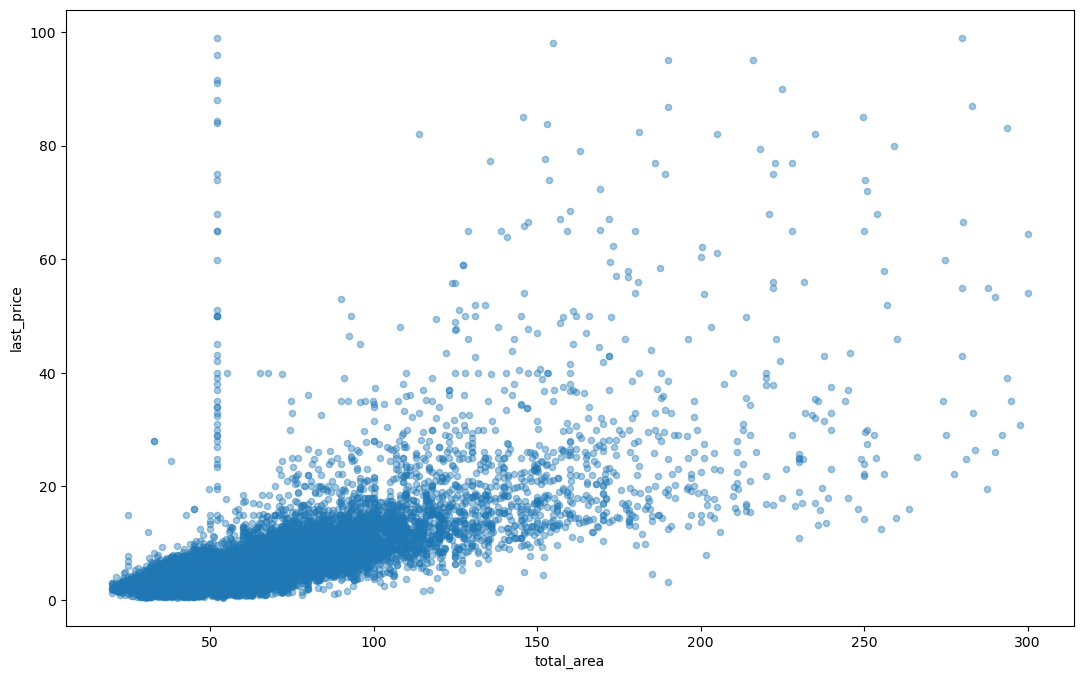

In [72]:
data.plot(x='total_area', y='last_price', kind='scatter', figsize=(13, 8), alpha=0.4);


**Построим диаграмму рассеяния для жилой площади и цены объектов недвижимости.**

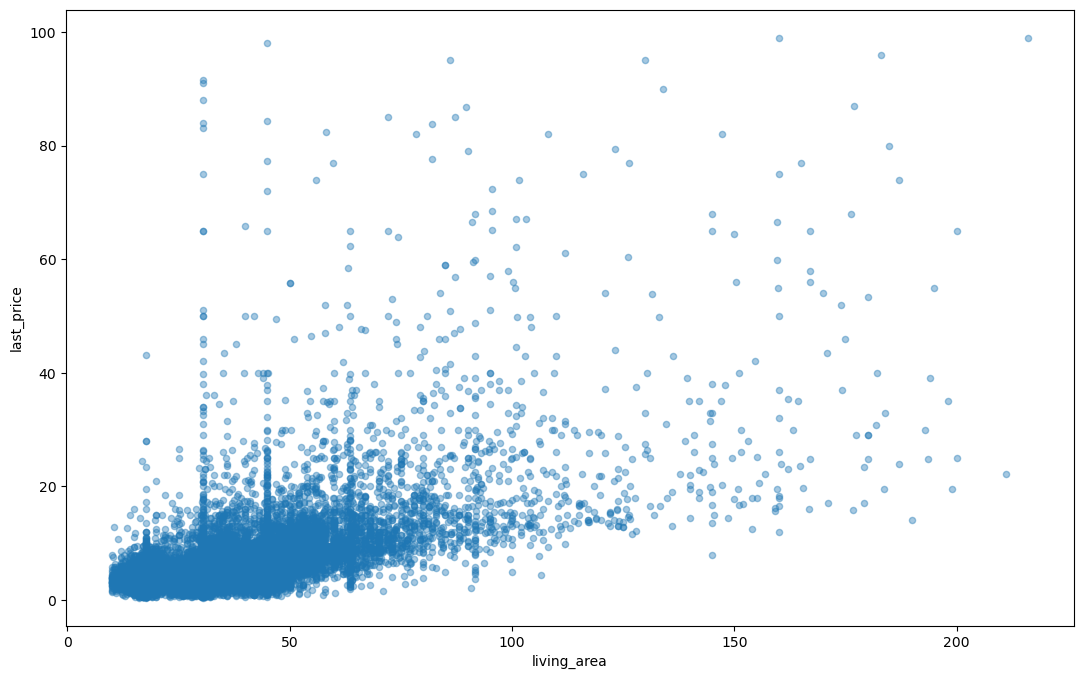

In [73]:
data.plot(x='living_area', y='last_price', kind='scatter', figsize=(13, 8), alpha=0.4);

**Построим диаграмму рассеяния для площади кухни и цены объектов недвижимости.**

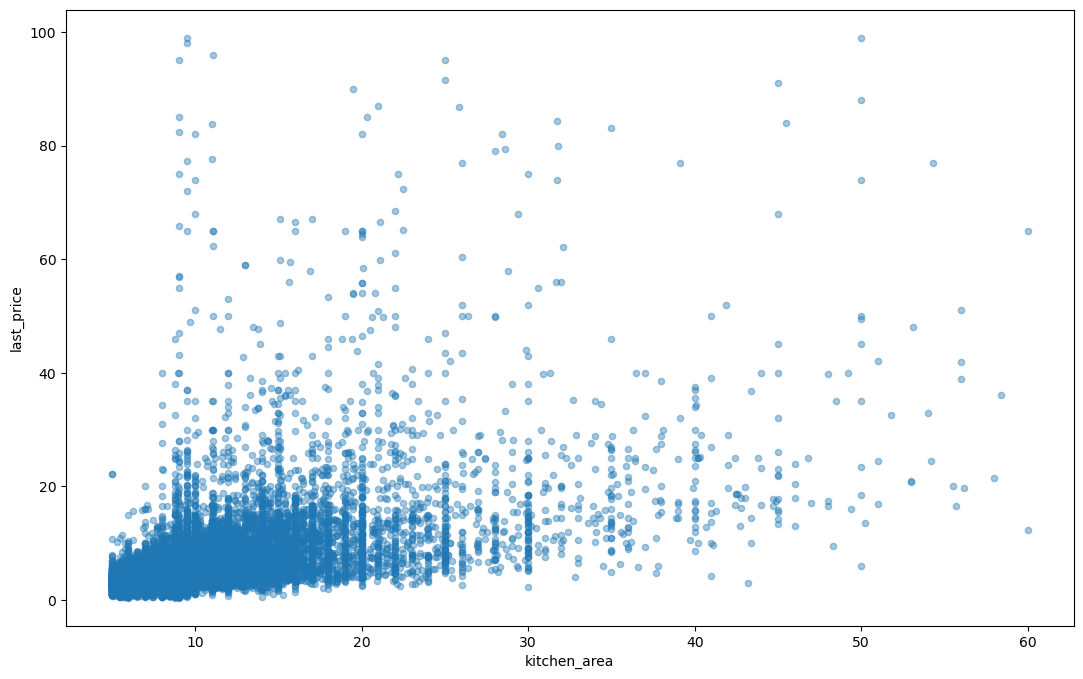

In [74]:
data.plot(x='kitchen_area', y='last_price', kind='scatter', figsize=(13, 8), alpha=0.4);

*На диаграммах можем наблюдать корреляцию цены от площадей. При увеличении площади растёт и цена.*

**Изучим зависимость между количеством комнат и цены объектов недвижимости.**

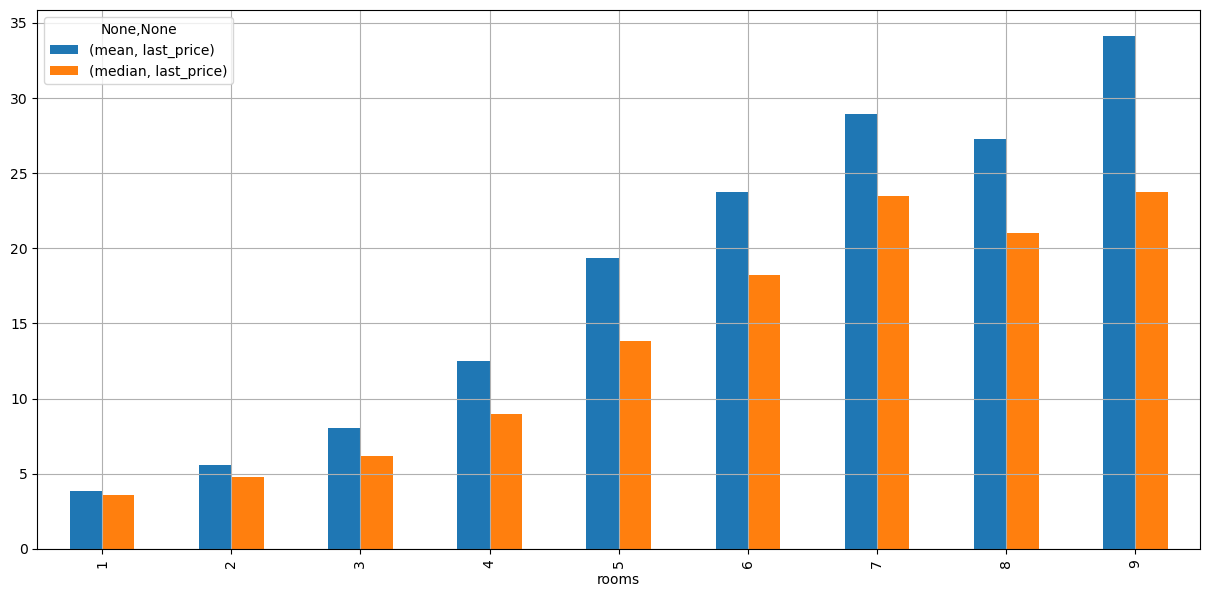

In [75]:
data.pivot_table(index='rooms', values='last_price', aggfunc = ['mean', 'median']).plot.bar\
(grid=True, figsize=(15, 7), style='o-');

*На графике мы можем наблюдать прямую корреляцию среднего и медианного значения цены от увеличения количества комнат.**

**Изучим зависимость между этажами и ценой объектов недвижимости.**

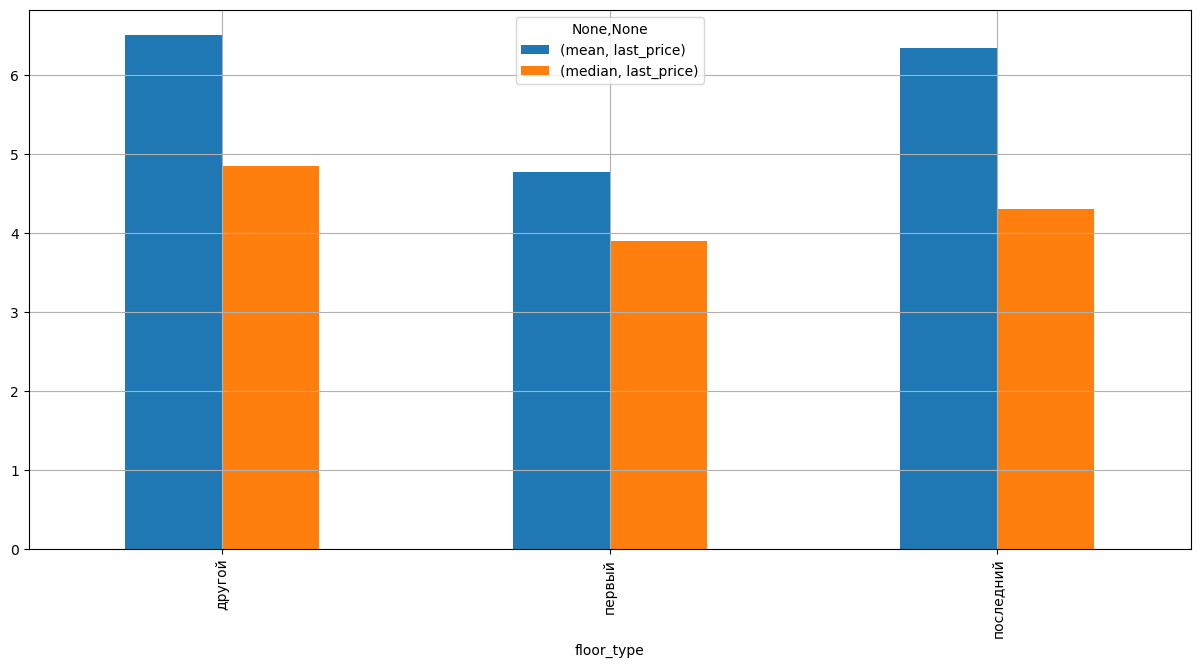

In [76]:
data.pivot_table(index='floor_type', values='last_price', aggfunc = ['mean', 'median']).plot.bar\
(grid=True, figsize=(15, 7), style='o-');

*На графике мы можем наблюдать снижение среднего и медианного значения цены на недвижимость на 1 этаже.*

**Изучим зависимость между днями недели и ценой объектов недвижимости.**

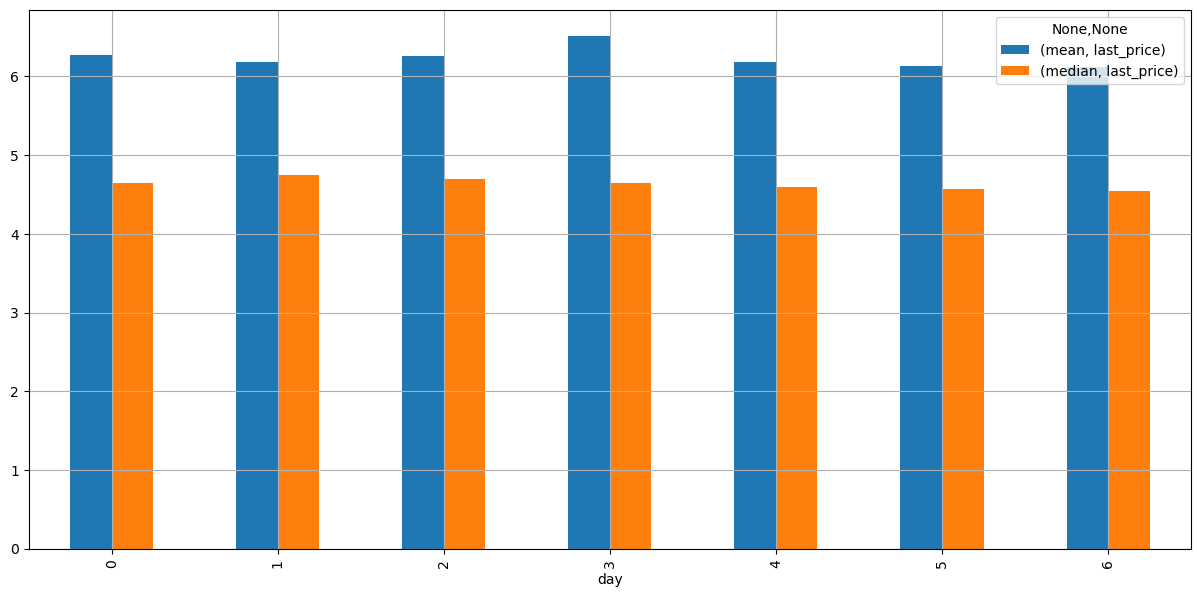

In [77]:
data.pivot_table(index='day', values='last_price', aggfunc = ['mean', 'median']).plot.bar\
(grid=True, figsize=(15, 7), style='o-');

*На графике мы можем наблюдать отсутствие корреляции между днями недели и ценой недвижимости.*

**Изучим зависимость между месяцами и ценой объектов недвижимости.**

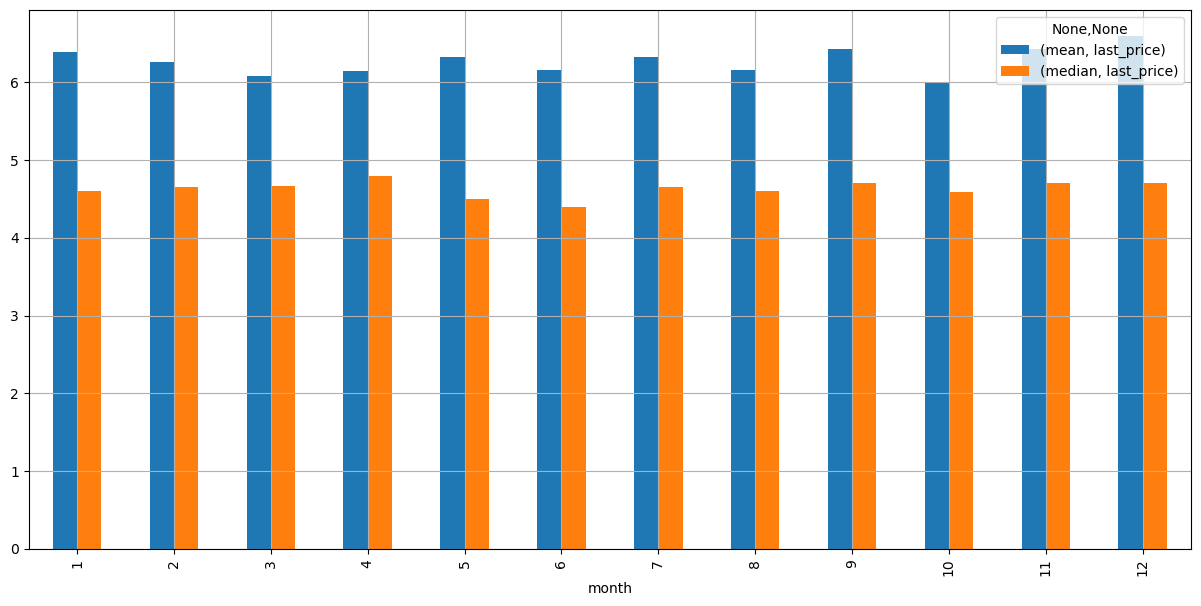

In [78]:
data.pivot_table(index='month', values='last_price', aggfunc = ['mean', 'median']).plot.bar\
(grid=True, figsize=(15, 7), style='o-');

*На графике мы можем наблюдать отсутствие корреляции между месяцем и ценой недвижимости.*

**Изучим зависимость между годами и ценой объектов недвижимости.**

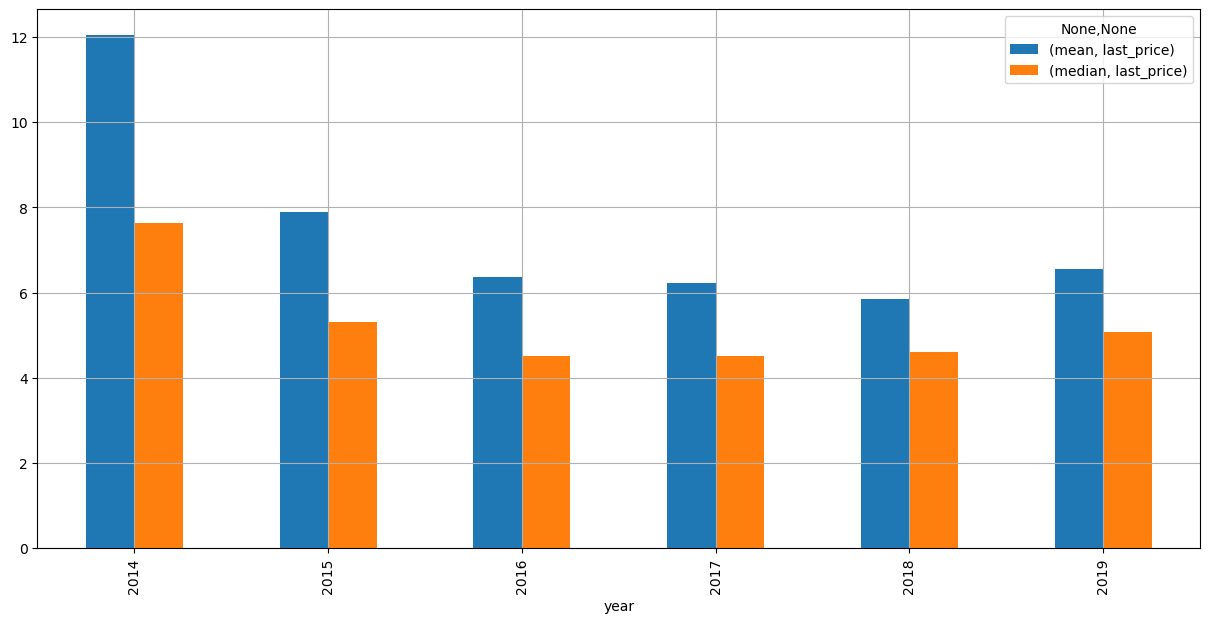

In [79]:
data.pivot_table(index='year', values='last_price', aggfunc = ['mean', 'median']).plot.bar\
(grid=True, figsize=(15, 7), style='o-');

*На графике мы можем наблюдать отсутствие корреляции между годом и ценой недвижимости.*

**Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выведем населённые пункты с самой высокой и низкой стоимостью квадратного метра.**

In [80]:
data_filter = data.pivot_table(index='locality_name', values= 'price_m2', aggfunc=['count', 'mean'])
data_filter = data_filter.reset_index()
data_filter.columns = ['locality', 'count_ads', 'price']
data_filter = data_filter.sort_values(by='count_ads', ascending=False).head(10)
display(data_filter)

,locality,count_ads,price
116,Санкт-Петербург,15465,115482.60
226,поселок Мурино,526,85029.52
54,Кудрово,449,95083.10
301,поселок Шушары,435,78277.94
18,Всеволожск,392,68618.01
105,Пушкин,369,106375.43
45,Колпино,338,77209.87
237,поселок Парголово,323,90289.78
23,Гатчина,307,68746.15
19,Выборг,237,58141.91


**Населённый пункт с самой низкой стоимостью квадратного метра.**

In [81]:
display(data_filter[data_filter['price'] == data_filter['price'].min()])                                                                

,locality,count_ads,price
19,Выборг,237,58141.91


**Населённый пункт с самой высокой стоимостью квадратного метра.**

In [82]:
display(data_filter[data_filter['price'] == data_filter['price'].max()])    

,locality,count_ads,price
116,Санкт-Петербург,15465,115482.60


*Рассмотрели первые 10 населённых пунктов с наибольшим количество объявлений.Также определили населённые пункты с самой низкой(Выборг - 58141.91) и высокой(Санкт-Петербург - 115482.60) стоимостью квадратного метра из ранее рассмотренной таблицы.*

**Ранее мы посчитали расстояние до центра в километрах. Теперь выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим среднюю цену каждого километра и опишем, как стоимость объектов зависит от расстояния до центра города.**

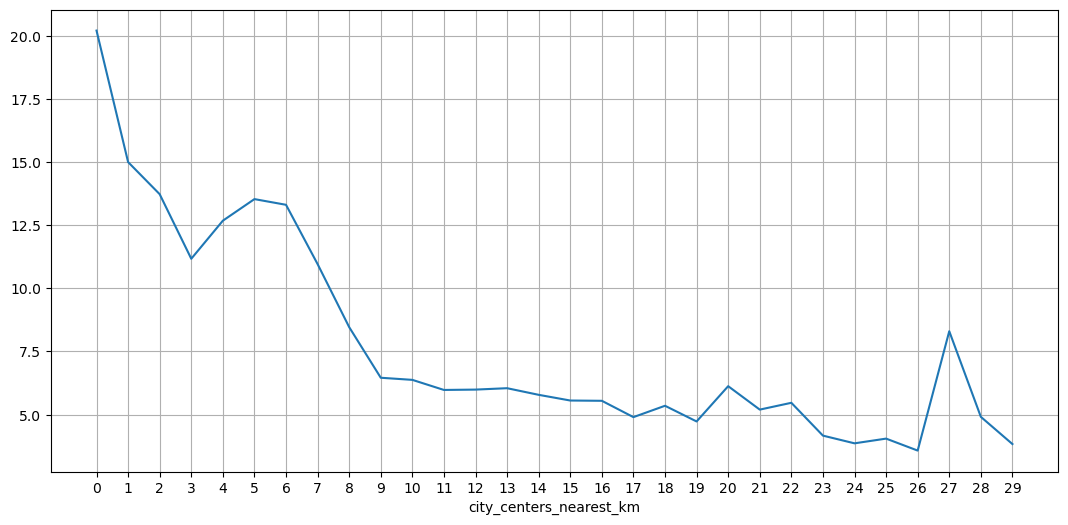

In [83]:
distance_spb = data.query('(locality_name == "Санкт-Петербург") and (city_centers_nearest_km != 88888)')\
.pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc='mean')
distance_spb.plot(grid=True, figsize=(13, 6), legend=None)
plt.xticks(np.arange(0,30,1));

*На графике мы можем наблюдать тенденцию к снижению цены при отдалении от центра города. Также мы можем заметить промежутки с 3 до 5 км.,17км.,19км. и 26км. с повышением цены, причиной может является "элитный район" или значимое культурное место.*

# Общий вывод

В ходе исследовательского анализа данных были обработаны пропуски в столбцах: "ceiling_height", "floors_total", "living_area", "is_apartment", "kitchen_area", "balcony", "locality_name", "city_сenters_nearest". Также были исправлены некорректно введённые данные в "locality_name". В ходе предобработки данных были удалены или заменены медианным значением аномалии в столбцах:"ceiling_height", "total_area", "living_area", "kitchen_area", "floors_total", "rooms","last_price".

Были изучены и построены графики для : общей площади, жилой площади, площади кухни, цены объекта, количества комнат, высоты потолков, этажей квартир, типов этажей квартир, общего количества этажей в доме, расстояния до центра города, расстояния до ближайшего аэропорта, расстояния до ближайшего парка, дня публикации объявления, месяца публикации объявления, года публикации объявления.

Изучили как быстро продавались квартиры построив гистограмму и посчитав среднее(181) и медианное(96) значение.

Выяснили какие факторы больше всего влияют на общую (полную) стоимость объекта:
- Цена коррелирует с величиной площади(чем больше площадь, тем дороже цена апартаментов).
- Цена коррелирует с количеством комнат(чем больше комнат, тем дороже цена апартаментов).
- Апартаменты на первом этаже являются менее предпочтительными.
- Не обнаружили зависимости между днём, месяцем,годом публикации и ценой.

Посчитали среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений:
- Санкт-Петербург - 115482.60
- поселок Мурино - 85029.52
- Кудрово - 95083.10
- поселок Шушары - 78277.94
- Всеволожск - 68618.01
- Пушкин - 106375.43
- Колпино - 77209.87
- поселок Парголово - 90289.78
- Гатчина - 68746.15
- Выборг - 58141.91

Определили населённые пункты с самой низкой(Выборг - 58141.91) и высокой(Санкт-Петербург - 115482.60) стоимостью квадратного метра.